# **NOTE**: For the different schems, only change **delta_x** and **delta_t**
### You can change these values to obtain the same numerical results in the report
---



## Imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# **FTCS**

---


In [ ]:
#PDE: u_t -a*u_x = 0
#For our PDE:
a=-1

#Space and time steps:
delta_x = 5e-3      
delta_t = 5e-6

#Use "arange" function from numpy to define space and time grids
x = np.arange(0,1+delta_x,delta_x)
t = np.arange(0,2+delta_t,delta_t)

#U_numeric is a matrix that contains the numeric solution for our x space, for every time step
U_numeric = np.zeros((len(t),len(x)))

#Let's use inital condition to obtain the first solution and insert it in U 
U_numeric[0] = np.exp((-(x-0.2)**2)/0.01) 

#U_analytical is the analytical solution for our x space, for the last time step (t=2)
#Using periodic boundary conditions, the shape of the function between x=0 and x=1 repeates between x=1 and x=2, and so on...
U_analytical =  np.exp((-((x-a*t[0])-0.2)**2)/0.01) 

In [ ]:
#Using FTCS scheme:
for n in range(1,len(U_numeric)):
  for j in range(len(U_numeric[n])):
    if j == 0: #Update 1st ponit of the grid
      U_numeric[n][j] = U_numeric[n-1][j] + ( a*delta_t/(2*delta_x) )*( U_numeric[n-1][j-2] - U_numeric[n-1][j+1] ) #To compute U of the first point of the grid we have use the penultimate point of the grid, because we have periodic boundary conditions
    
    elif j == len(U_numeric[n])-1: #Update last ponit of the grid
      U_numeric[n][j] = U_numeric[n-1][j] + ( a*delta_t/(2*delta_x) )*( U_numeric[n-1][j-1] - U_numeric[n-1][1] ) #To compute U of the last point of the grid we have use the second point of the grid, because we have periodic boundary conditions
    
    else: #Update remaining points of the grid 
      U_numeric[n][j] = U_numeric[n-1][j] + ( a*delta_t/(2*delta_x) )*( U_numeric[n-1][j-1] - U_numeric[n-1][j+1] ) #Usual FTCS scheme equation  
 

Text(0.5, 1.0, 'FTCS, t=2, dt = 5e-6')

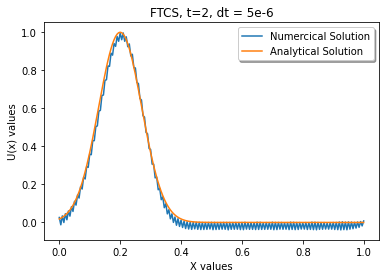

In [ ]:
plt.plot(x,U_numeric[len(t)-1])
plt.plot(x,U_analytical)     
plt.legend(('Numercical Solution', 'Analytical Solution'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FTCS, t=2, dt = 5e-6')

# **Leapforg**

---


In [ ]:
#PDE: u_t -a*u_x = 0
#For our PDE:
a=-1

#Space and time steps:
delta_x = 1e-3
delta_t = 1e-4

#Use "arange" function from numpy to define space and time grids
x = np.arange(0,1+delta_x,delta_x)
t = np.arange(0,2+delta_t,delta_t)

#U_numeric is a matrix that contains the numeric solution for our x space, for every time step
U_numeric = np.zeros((len(t),len(x)))

#Let's use inital condition to obtain the first solution and insert it in U 
U_numeric[0] = np.exp((-(x-0.2)**2)/0.01) 

#U_analytical is the analytical solution for our x space, for the last time step (t=2)
#Using periodic boundary conditions, the shape of the function between x=0 and x=1 repeates between x=1 and x=2, and so on...
U_analytical =  np.exp((-((x-a*t[0])-0.2)**2)/0.01) 

In [ ]:
#Using Leapfrog scheme:
for n in range(1,len(U_numeric)):
  for j in range(len(U_numeric[n])):
    if j == 0: #Update 1st ponit of the grid
      U_numeric[n][j] = U_numeric[n-2][j] - ( a*delta_t/delta_x )*( U_numeric[n-1][j+1] - U_numeric[n-1][j-2] ) #To compute U of the first point of the grid we have use the penultimate point of the grid, because we have periodic boundary conditions
    
    elif j == len(U_numeric[n])-1: #Update last ponit of the grid
      U_numeric[n][j] = U_numeric[n-2][j] - ( a*delta_t/delta_x )*( U_numeric[n-1][1] - U_numeric[n-1][j-1] ) #To compute U of the last point of the grid we have use the second point of the grid, because we have periodic boundary conditions

    else: #Update remaining points of the grid 
      U_numeric[n][j] = U_numeric[n-2][j] - ( a*delta_t/delta_x )*( U_numeric[n-1][j+1] - U_numeric[n-1][j-1] ) #Usual Lepfrog scheme equation  

Text(0.5, 1.0, 'Leapfrog, t=2, dt=1e-4')

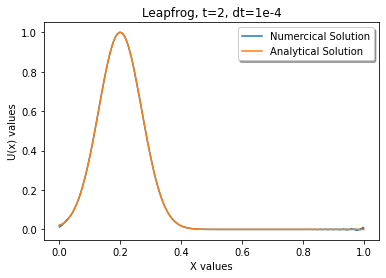

In [ ]:
plt.plot(x,U_numeric[len(t)-1])
plt.plot(x,U_analytical) 

plt.legend(('Numercical Solution','Analytical Solution'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('Leapfrog, t=2, dt=1e-4')    

# **BTCS**

---


In [ ]:
#PDE: u_t -a*u_x = 0
#For our PDE:
a=-1

#Space and time steps:
delta_x = 0.005
delta_t = 1e-5
#Use "arange" function from numpy to define space and time grids
x = np.arange(0,1+delta_x,delta_x)
t = np.arange(0,2+delta_t,delta_t)

#U_numeric is a matrix that contains the numeric solution for our x space, for the t=2
A = np.zeros((len(x),len(x)))


#U_analytical is the analytical solution for our x space, for the last time step (t=2)
#Using periodic boundary conditions, the solution at time t=2 is equal to the solution at time t=0
U_analytical =  np.exp((-((x-a*t[0])-0.2)**2)/0.01) 

In [ ]:
U_0 = np.zeros(len(x))
for i in range(len(U_0)):
  U_0[i] = np.exp((-((x[i]-0.2)**2)/0.01))

for i in range(len(A)):
  A[i][i] = 1
  if i < len(A)-1 :
    A[i][i+1] = -delta_t/(2*delta_x)
  if i > 0:
    A[i][i-1] = delta_t/(2*delta_x)
  
  A[0][len(x)-2] = delta_t/(2*delta_x)
  A[-1][1] = -delta_t/(2*delta_x)
# print("eixo x:",x)
# print("matriz A:", A)
# print("vetor soluçao incial:",U_prev)
for i in t[1:]:
  if i == t[1]:
    # print("entrei1")
    U_prev = [e for e in U_0]
    # print(U_prev)

  else:
    # print("entrei2")
    U_prev = [e for e in sol]
    # print(U_prev)

  # print(U_prev)
  sol = np.linalg.solve(A,U_prev)
  # print("Solução após inverter A e fazer produtor interno com vetor U prévio:",sol)
  U_prev = [e for e in sol]


Text(0.5, 1.0, 'BTCS, t=2, dt=1e-5')

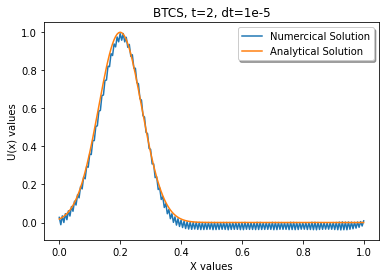

In [ ]:
plt.plot(x,sol)
plt.plot(x,U_analytical) 

plt.legend(('Numercical Solution','Analytical Solution'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('BTCS, t=2, dt=1e-5')    